<a href="https://colab.research.google.com/github/padmapalle/ML-lab-/blob/main/logistic%20regression_q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [5]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [11]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [12]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [13]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [16]:
corr = df.corr()

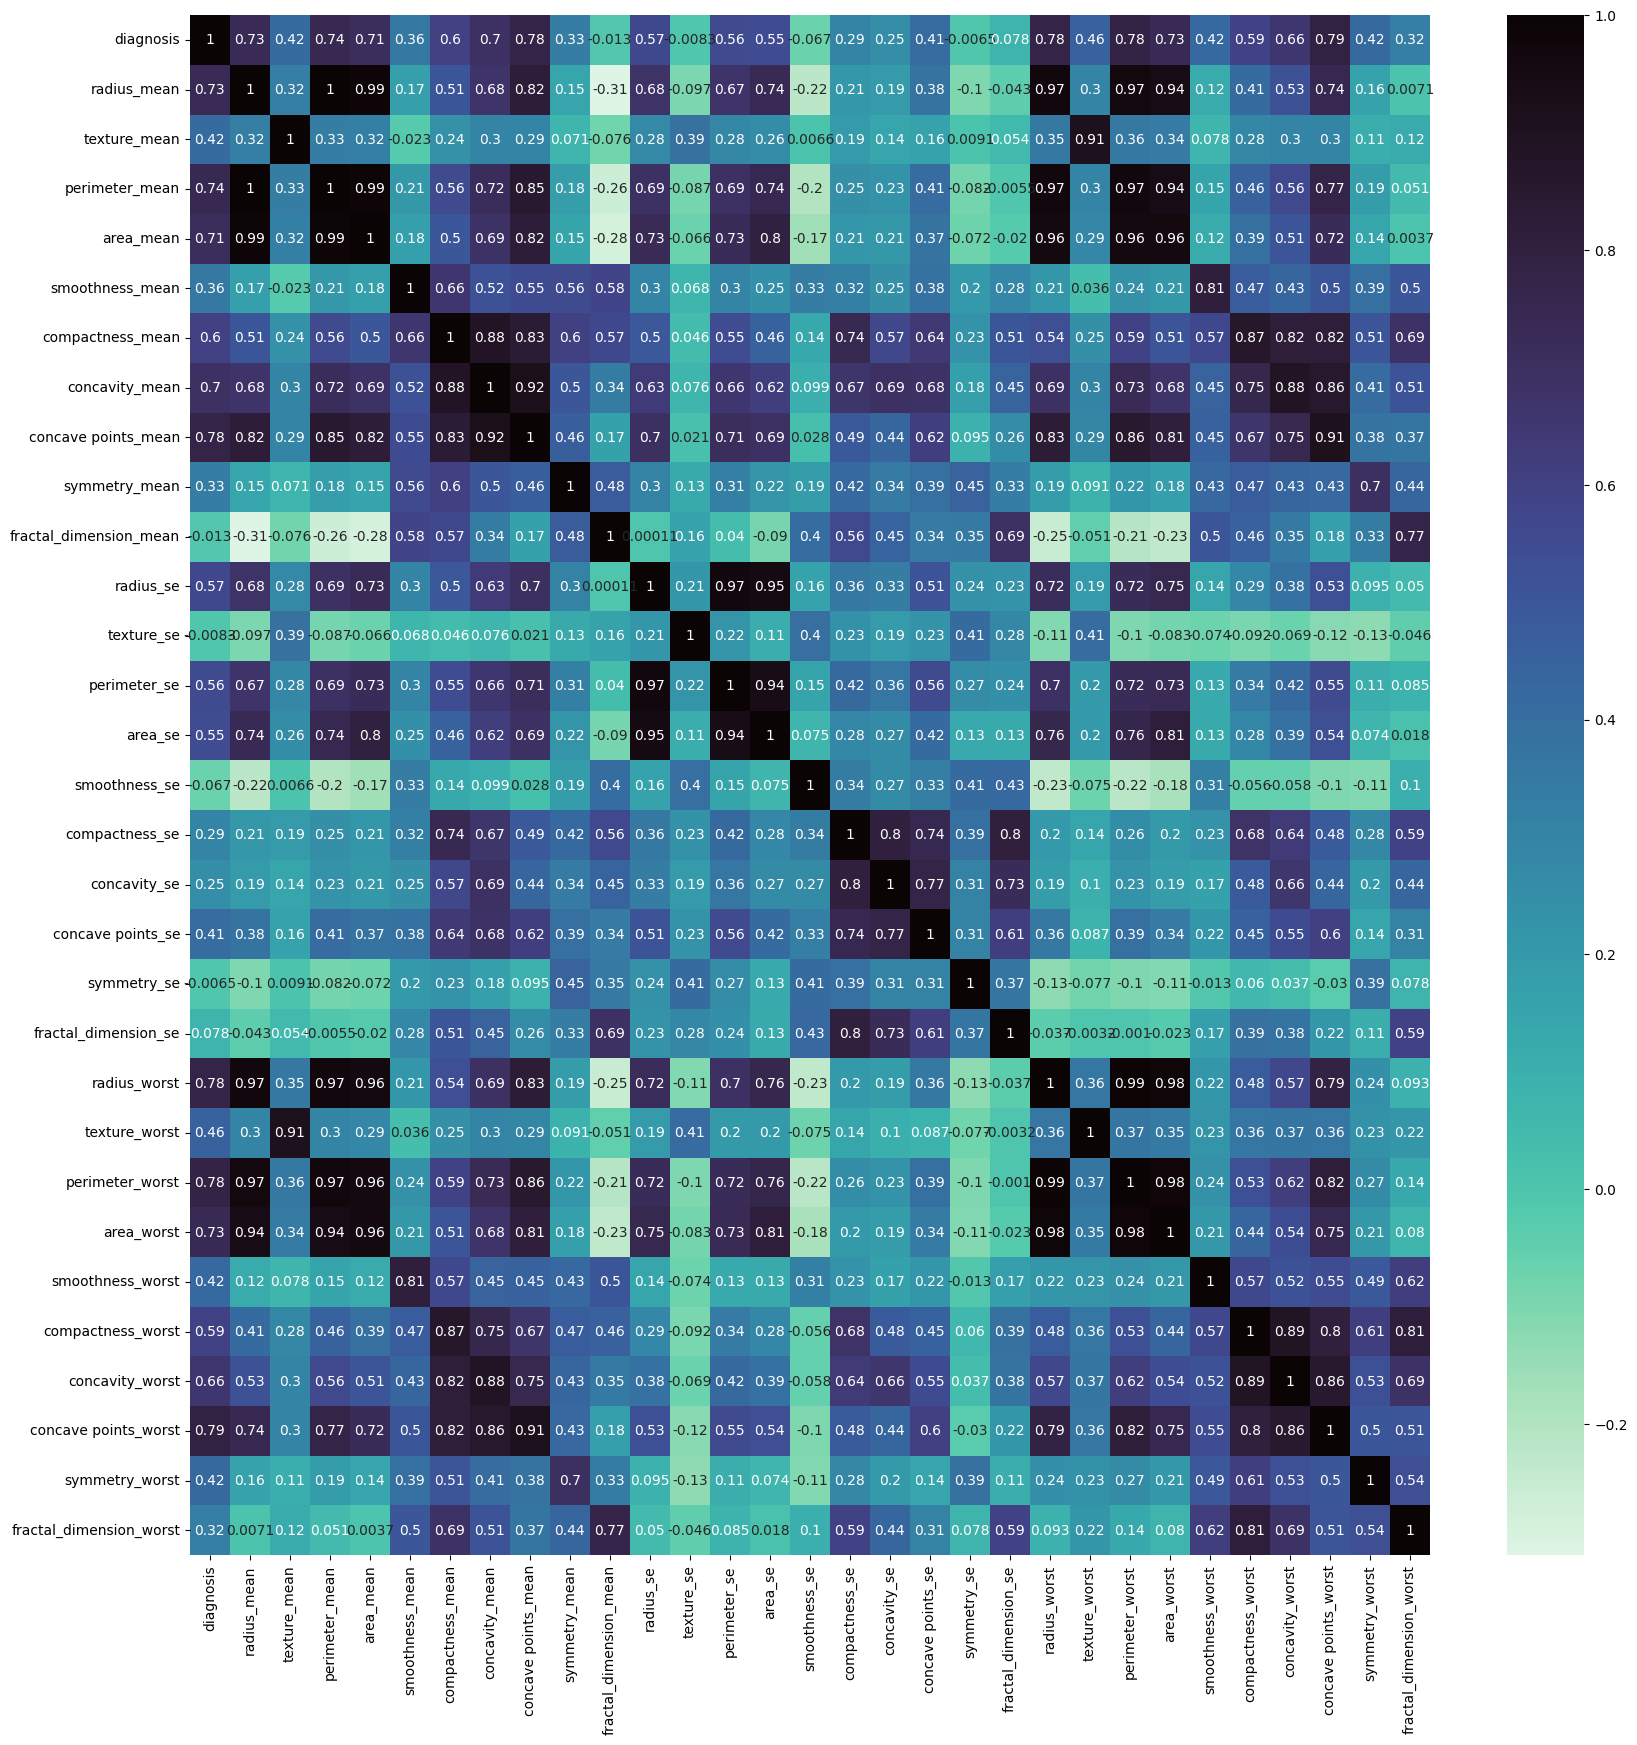

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [19]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


In [20]:
X = df[names].values
y = df['diagnosis'].values

In [21]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

In [24]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    The sigmoid function is a mathematical function used in logistic regression and neural networks
    to map any real-valued number to a value between 0 and 1.

    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)
        0.5
    """
    # Compute the sigmoid function using the formula: 1 / (1 + e^(-z)).
    sigmoid_result = 1 / (1 + np.exp(-z))

    # Return the computed sigmoid value.
    return sigmoid_result

In [25]:
z = np.linspace(-12, 12, 200)

fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9",
    xaxis=dict(color="#41BEE9"),
    yaxis=dict(color="#41BEE9")
)
fig.show()

In [26]:
class LogisticRegression:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes the parameters of the model.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0


    def forward(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
#         print(X.shape, self.W.shape)
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (
                1 - self.y))  # we are adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m


    def fit(self, X, y, iterations, plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9",title="Iterations"),
                yaxis=dict(color="#41BEE9",title="cost")
            )
            fig.show()


    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)


    def save_model(self, filename=None):
        """
        Save the trained model to a file using pickle.

        Parameters:
            filename (str): The name of the file to save the model to.
        """
        model_data = {
            'learning_rate': self.learning_rate,
            'W': self.W,
            'b': self.b
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        """
        Load a trained model from a file using pickle.

        Parameters:
            filename (str): The name of the file to load the model from.

        Returns:
            LogisticRegression: An instance of the LogisticRegression class with loaded parameters.
        """
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        # Create a new instance of the class and initialize it with the loaded parameters
        loaded_model = cls(model_data['learning_rate'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model

In [27]:
lg = LogisticRegression()
lg.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.2570778370558246
Cost after iteration 20000: 0.19529178673689726
Cost after iteration 30000: 0.16685820756163852
Cost after iteration 40000: 0.14978939548676498
Cost after iteration 50000: 0.1381876134031554
Cost after iteration 60000: 0.1296814121248933
Cost after iteration 70000: 0.1231144039988139
Cost after iteration 80000: 0.11785163708790082
Cost after iteration 90000: 0.113513771386002


In [28]:
lg.save_model("model.pkl")


In [29]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [30]:
model = LogisticRegression.load_model("model.pkl")

In [31]:
y_pred = model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 98.23%
Precision: 100.00%
Recall: 95.24%
F1-Score: 97.56%
